In [1]:
# import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to C:\Users\'Dare
[nltk_data]     Badejo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import the dataset
import zipfile
import os 
# Path to the ZIP file
zip_file_path = "tiktok_google_play_reviews.csv.zip"

# Directory to extract the files
extracted_dir = "extracted_tiktok"

# Create a directory to extract the files
if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# Find the CSV file containing tweets
csv_file_path = None
for root, dirs, files in os.walk(extracted_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_file_path = os.path.join(root, file)
            break

# Read the CSV file into a DataFrame
if csv_file_path:
    data = pd.read_csv(csv_file_path)
    print("DataFrame loaded successfully.")
    # Now you can work with the DataFrame 'df'
else:
    print("No CSV file containing tweets found in the extracted directory.")


C:\conda_tmp\ipykernel_20084\1523682360.py:28: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file_path)


DataFrame loaded successfully.


In [5]:
print(data) 

                                    reviewId              userName  \
0       68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1       d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2       96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3       078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4       8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   
...                                      ...                   ...   
460282  73cf78fe-599d-4488-8a8b-ae443847303b           hera killar   
460283  16d331c8-ba21-4aeb-ac01-dec455ca48ad        Hiox Softwares   
460284  fbb86777-b885-4f76-b49e-13e424aa5afc       Md. Zahid Hasan   
460285  28df682c-bb17-4224-8658-642a92a2c723              Ash Ryan   
460286  1cfbb2b3-fb0b-4f4b-8963-9e2b803f24dc           Haroon Jaan   

                                                userImage  \
0       https://play-lh.googleusercontent.com/a/ALm5wu...   
1       https://play-lh.googleusercon

In [6]:
data = data[["content", "score"]]
print(data.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [7]:
print(data.isnull().sum())

content    31
score       0
dtype: int64


In [9]:
data = data.dropna()

In [10]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

In [11]:
# Ratings distribution 
# Now let’s have a look at the percentages of ratings given to TikTok on the Google Play store:
ratings = data["score"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data, values=quantity, names=numbers,hole = 0.5)
figure.show()

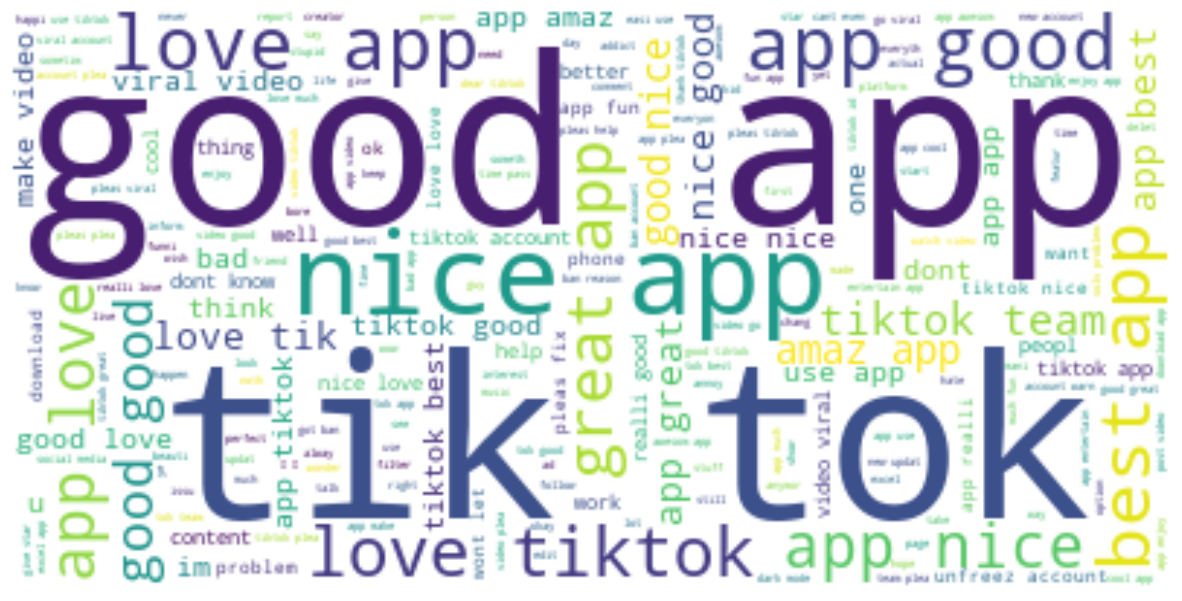

In [12]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to C:\Users\'Dare
[nltk_data]     Badejo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


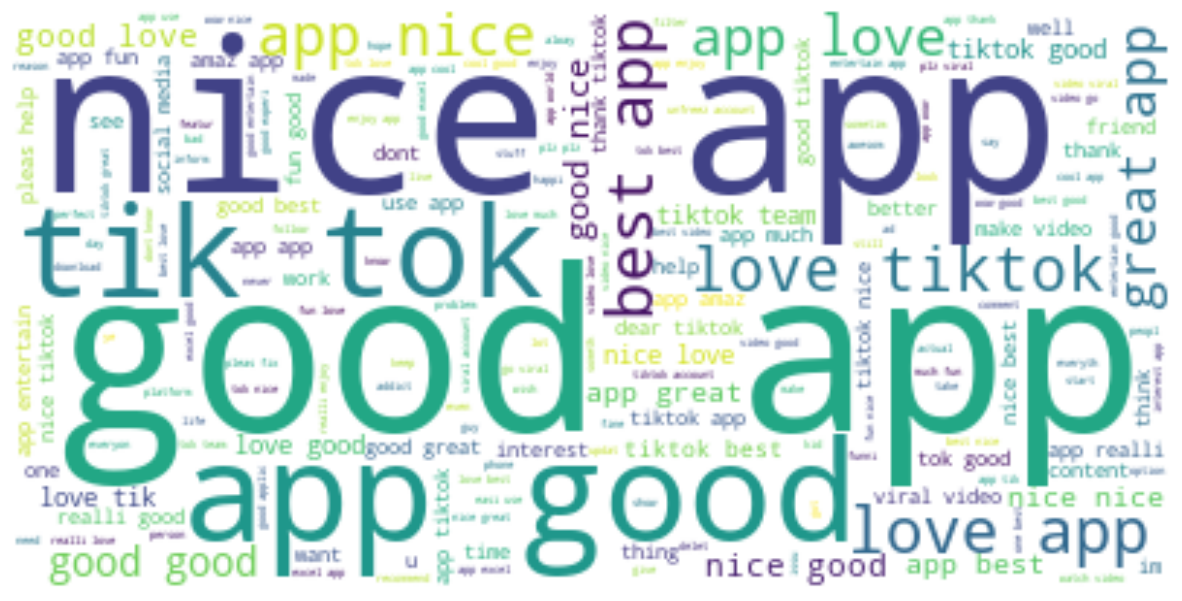

In [14]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()